In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [9]:
df = load_iris()
X = df.data #array
y = df.target # array

In [10]:
X.shape, type(X), y.shape, type(y)

((150, 4), numpy.ndarray, (150,), numpy.ndarray)

In [11]:
# Feature scaling
sc = StandardScaler()
df_std = sc.fit_transform(X)

Principle Component Score (Score)

In [20]:
pca = PCA(n_components = 4)
transformed_arr = pca.fit_transform(df_std)
pca_col = [f"PC{x + 1}" for x in range(transformed_arr.shape[1])]
transformed_df = pd.DataFrame(transformed_arr, columns=pca_col)
transformed_arr.shape, transformed_df

((150, 4),
           PC1       PC2       PC3       PC4
 0   -2.264703  0.480027 -0.127706 -0.024168
 1   -2.080961 -0.674134 -0.234609 -0.103007
 2   -2.364229 -0.341908  0.044201 -0.028377
 3   -2.299384 -0.597395  0.091290  0.065956
 4   -2.389842  0.646835  0.015738  0.035923
 ..        ...       ...       ...       ...
 145  1.870503  0.386966  0.256274 -0.389257
 146  1.564580 -0.896687 -0.026371 -0.220192
 147  1.521170  0.269069  0.180178 -0.119171
 148  1.372788  1.011254  0.933395 -0.026129
 149  0.960656 -0.024332  0.528249  0.163078
 
 [150 rows x 4 columns])

Contribution Ratio & Cumulative Contribution Ratio

In [13]:
contribution_ratio = pca.explained_variance_ratio_ # Conribution ratio
cumulative_contribution_ratio = pca.explained_variance_ratio_.cumsum() # Cumulative contribution ratio
pca_table = pd.DataFrame(data=[contribution_ratio, cumulative_contribution_ratio], columns=pca_col, index=['Contribution Ratio', 'Cumulative Contribution Ratio'])
pca_table

,PC1,PC2,PC3,PC4
Contribution Ratio,0.729624,0.228508,0.036689,0.005179
Cumulative Contribution Ratio,0.729624,0.958132,0.994821,1.000000


In [22]:
# Eigenvalues
# eigenvalues, which represent the amount of variance captured by each principal component.
# Comtribution ratio is the ratio of an eigenvalue to the total eigenvalues
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

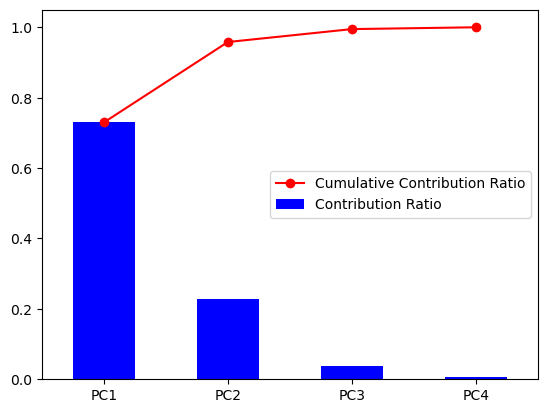

In [14]:
fig, ax = plt.subplots()
pca_table.iloc[0, :].plot(kind='bar', color='blue')
pca_table.iloc[1, :].plot(kind='line', marker='o', color='r')
plt.legend()
plt.show()

Loadings (Eigenvector)

In [17]:
loadings = pd.DataFrame(pca.components_.T, columns=pca_col, index=df.feature_names)
loadings

,PC1,PC2,PC3,PC4
sepal length (cm),0.521066,0.377418,-0.719566,-0.261286
sepal width (cm),-0.269347,0.923296,0.244382,0.123510
petal length (cm),0.580413,0.024492,0.142126,0.801449
petal width (cm),0.564857,0.066942,0.634273,-0.523597
